In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from keras.datasets import mnist

In [7]:
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras import utils
from keras.utils import to_categorical
import pickle

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_test.shape

(10000,)

In [13]:
x_train.shape

(60000, 28, 28)

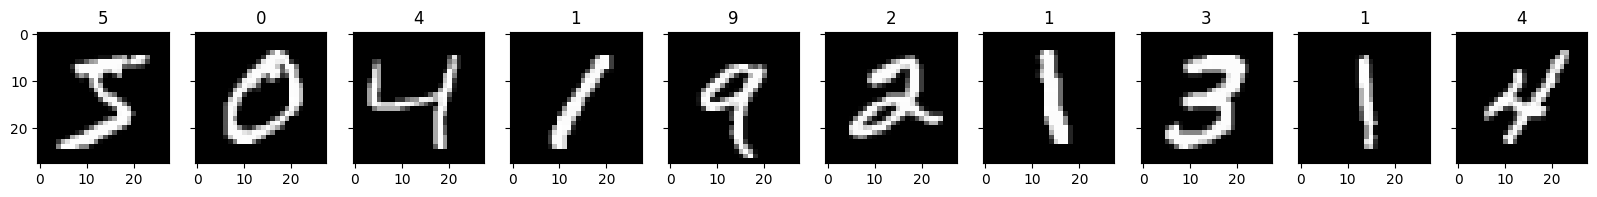

In [16]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 5))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()

In [17]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_test.shape

(10000, 10)

In [22]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

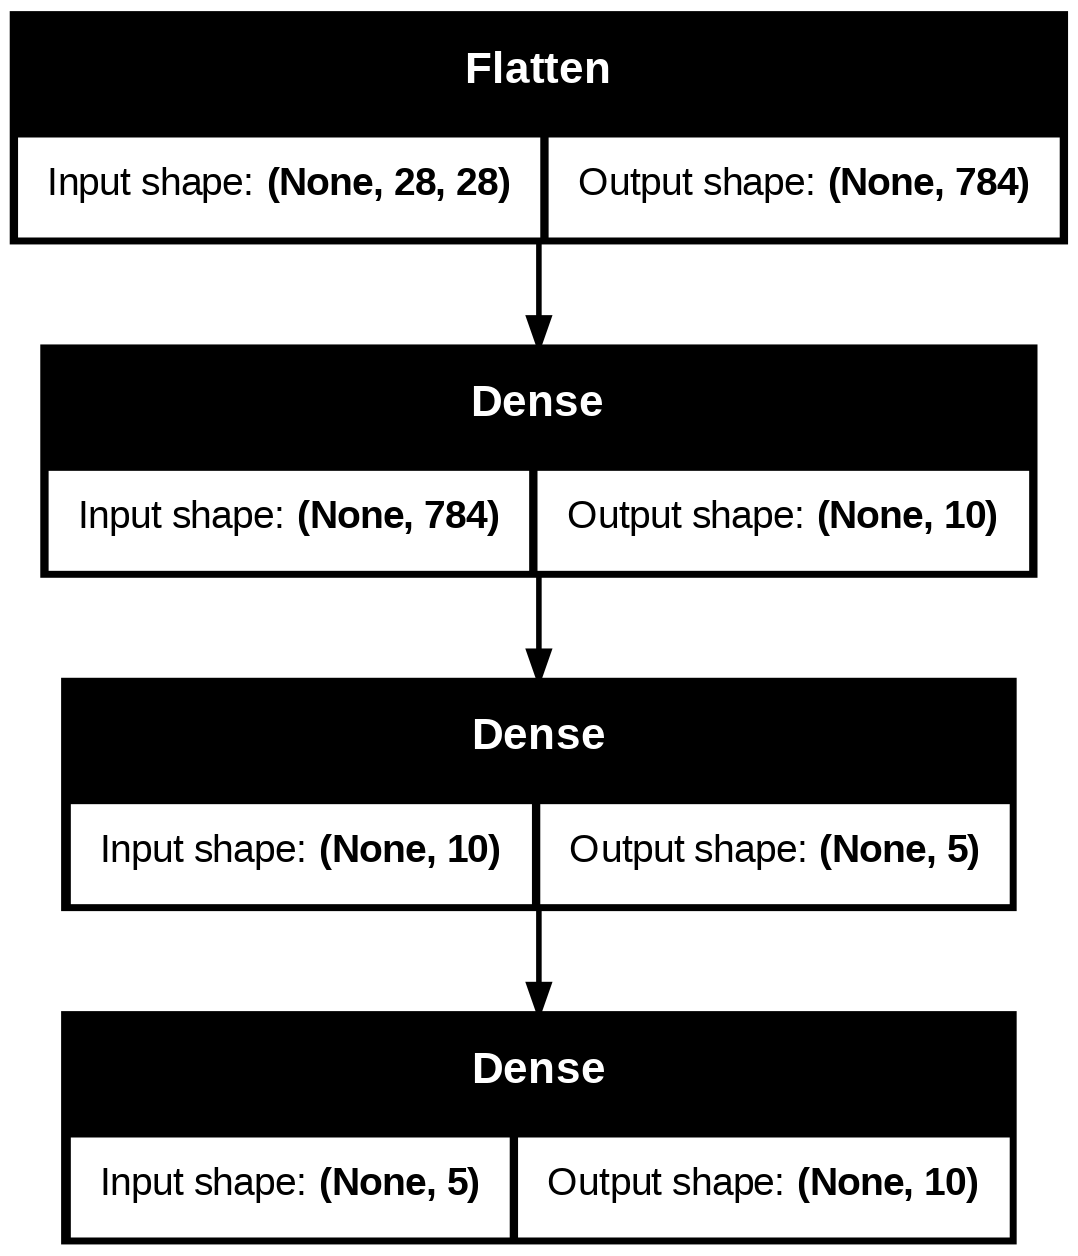

In [29]:
tensorflow.keras.utils.plot_model(model,to_file="model.png",show_shapes=True,expand_nested=True)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7995 - loss: 0.6701 - val_acc: 0.8002 - val_loss: 0.6772
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7984 - loss: 0.6809 - val_acc: 0.7965 - val_loss: 0.6722
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7945 - loss: 0.6751 - val_acc: 0.8102 - val_loss: 0.6413
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8160 - loss: 0.6340 - val_acc: 0.8199 - val_loss: 0.6435
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8174 - loss: 0.6280 - val_acc: 0.8195 - val_loss: 0.6323
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8325 - loss: 0.6002 - val_acc: 0.8251 - val_loss: 0.6123
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8226 - loss: 0.6010 - val_acc: 0.8223 - val_loss: 0.6084
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8390 - loss: 0.5792 - val_acc: 0.8240 - val_loss: 0.6074
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [44]:
pickle.dump(model, open('model.pkl', 'wb'))

In [45]:
history.history

{'acc': [0.7976666688919067,
  0.8012999892234802,
  0.7977499961853027,
  0.8149999976158142,
  0.8175166845321655,
  0.8328166604042053,
  0.8259666562080383,
  0.841866672039032,
  0.8305500149726868,
  0.8489000201225281],
 'loss': [0.6786150336265564,
  0.6709959506988525,
  0.6685259342193604,
  0.6372272372245789,
  0.6326931715011597,
  0.597186267375946,
  0.5987486243247986,
  0.5767673254013062,
  0.593252956867218,
  0.5457383990287781],
 'val_acc': [0.8001999855041504,
  0.796500027179718,
  0.8101999759674072,
  0.8198999762535095,
  0.8195000290870667,
  0.8251000046730042,
  0.8223000168800354,
  0.8240000009536743,
  0.8531000018119812,
  0.8431000113487244],
 'val_loss': [0.6772181391716003,
  0.672213613986969,
  0.6412825584411621,
  0.6435118317604065,
  0.6322742700576782,
  0.612250566482544,
  0.6084025502204895,
  0.6073852777481079,
  0.5455988645553589,
  0.5593331456184387]}

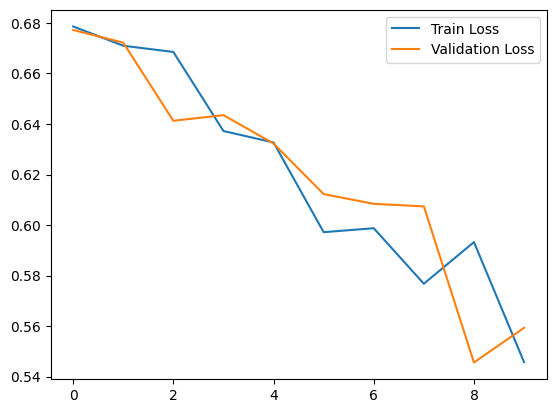

In [46]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

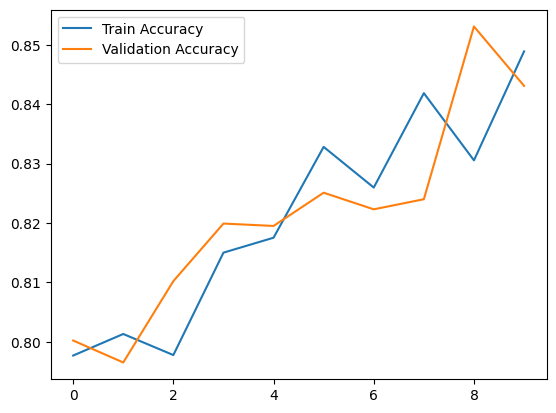

In [47]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()

In [48]:
model = pickle.load(open('model.pkl', 'rb'))

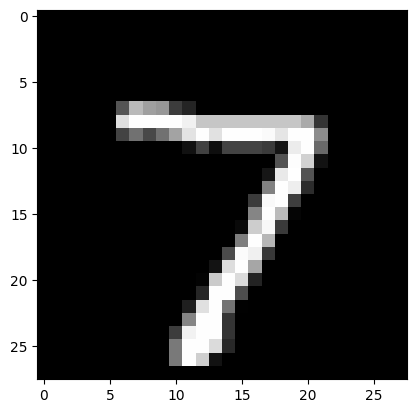

In [49]:
plt.imshow(x_test[0], cmap='gray')

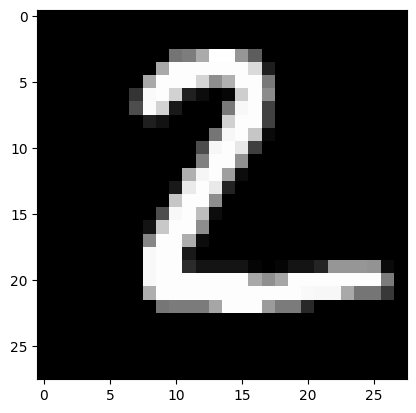

In [50]:
plt.imshow(x_test[1], cmap='gray')

In [51]:
x = np.reshape(x_test[0], (1, 28, 28))
predicted_label = model.predict(x)
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[1.6489299e-04 2.6028764e-02 1.0635946e-03 1.5639847e-02 1.2479034e-04
  1.2006350e-04 1.3233434e-08 9.4719714e-01 8.8602414e-05 9.5724249e-03]]


In [52]:
np.argmax(predicted_label)

7